# PROJECT

The aim of this project is to building a model for predicting diabet situation. Our label will be `Outcome` column.

## Steps
- Read the `diabetes.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, do we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.

# 1) Loading Libraries and Data

In [39]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Read csv file
data = pd.read_csv("C:/Users/Hp/Desktop/ML_Course_19-11-20-main/Project/diabetes.csv")

## 2) Preparing the Data

Data preparation, where we load our data into a suitable place and prepare it for use in our machine learning training. This is also a good time to do any pertinent visualizations of your data, to help you see if there are any relevant relationships between different variables you can take advantage of, as well as show you if there are any data imbalances.

In [48]:
df = data.copy()
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Take away : No missing values. All dimesions are numerics. So, no conversion required.
#However, there are 0 values for Glucose, BloodPressure, SkinThickness, Insulin, BMI , Which cannot be correct. So, needs to be treated.

In [56]:
df.describe() #There are incorrect values i.e.0's in Glucose, BloodPressure, SkinThickness, Insulin, BMI. 
# replacing 0 with median of corresponding column.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [60]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Take away : No missing values. All dimesions are numerics. So, no conversion required.
#However, there are 0 values for Glucose, BloodPressure, SkinThickness, Insulin, BMI. Obviously, these are not correct. So, needs to be treated.

In [64]:
df.shape # print dimension

(768, 9)

In [68]:
df.Outcome.value_counts() # there are more data points for non-diabetics compared to diabetics,model which will be trained using this data ideally it should be good in predicting the non-diabetics patients first.

0    500
1    268
Name: Outcome, dtype: int64

In [72]:
# Check data types of dataset
df.dtypes # all data types are numeric. So, encoding is needed

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3) Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [76]:
df.groupby(by="Outcome").count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268

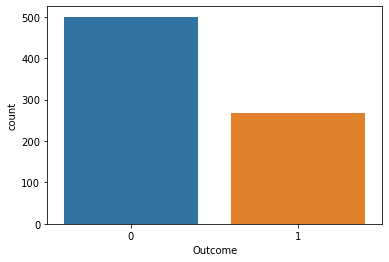

In [80]:
sns.countplot(x='Outcome' , data =df);

Out of 768 data points, 500 are labeled as 0 and 268 as 1. Outcome 0 means No diabetes, outcome 1 means diabetes

In [184]:
df_t.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [84]:
df_t = df.drop(["Pregnancies","Outcome"],axis = 1)
df_t
medians = df_t.median()
print("medians",medians)
df_nonzero = df_t.replace(0,medians)
df_nonzero["Pregnancies"] = df["Pregnancies"]
df_nonzero["Outcome"] = df["Outcome"]
df_nonzero

medians Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35     30.5  33.6   
1         85             66             29     30.5  26.6   
2        183             64             23     30.5  23.3   
3         89             66             23     94.0  28.1   
4        137             40             35    168.0  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48    180.0  32.9   
764      122             70             27     30.5  36.8   
765      121             72             23    112.0  26.2   
766      126             60             23     30.5  30.1   
767       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  
0                       0.627   50            6        1  
1                       0.351   31            1        0  
2                       0.672   32            8        1  
3                       0.167   21            1        0  
4                       2.288   33            0        1  
..                        ...  ...          ...      ...  
763                     0.171   63           10        0  
764                     0.340   27            2        0  
765                     0.245   30            5        0  
766                     0.349   47            1        1  
767                     0.315   23            1        0  

[768 rows x 9 columns]

In [88]:
corr = df_nonzero.corr()
corr
# Takeaway : outcome is positively corelated to Glucose feature.
# Age & no. of pregencies have positive corelation.
# BMI & Skin thickness has positive corelation
# No other strong negetive corelation is observed.

Glucose  BloodPressure  SkinThickness   Insulin  \
Glucose                   1.000000       0.218937       0.172143  0.357573   
BloodPressure             0.218937       1.000000       0.147809 -0.028721   
SkinThickness             0.172143       0.147809       1.000000  0.238188   
Insulin                   0.357573      -0.028721       0.238188  1.000000   
BMI                       0.231400       0.281132       0.546951  0.189022   
DiabetesPedigreeFunction  0.137327      -0.002378       0.142977  0.178029   
Age                       0.266909       0.324915       0.054514 -0.015413   
Pregnancies               0.128213       0.208615       0.032568 -0.055697   
Outcome                   0.492782       0.165723       0.189065  0.148457   

                               BMI  DiabetesPedigreeFunction       Age  \
Glucose                   0.231400                  0.137327  0.266909   
BloodPressure             0.281132                 -0.002378  0.324915   
SkinThickness             0.546951                  0.142977  0.054514   
Insulin                   0.189022                  0.178029 -0.015413   
BMI                       1.000000                  0.153506  0.025744   
DiabetesPedigreeFunction  0.153506                  1.000000  0.033561   
Age                       0.025744                  0.033561  1.000000   
Pregnancies               0.021546                 -0.033523  0.544341   
Outcome                   0.312249                  0.173844  0.238356   

                          Pregnancies   Outcome  
Glucose                      0.128213  0.492782  
BloodPressure                0.208615  0.165723  
SkinThickness                0.032568  0.189065  
Insulin                     -0.055697  0.148457  
BMI                          0.021546  0.312249  
DiabetesPedigreeFunction    -0.033523  0.173844  
Age                          0.544341  0.238356  
Pregnancies                  1.000000  0.221898  
Outcome                      0.221898  1.000000

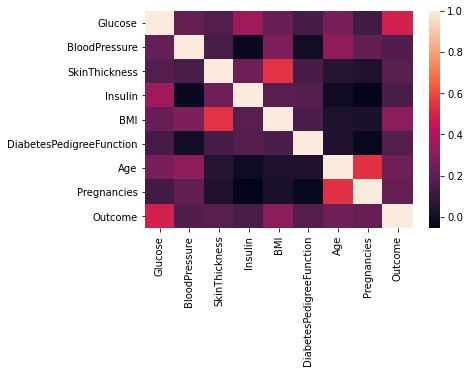

In [91]:
sns.heatmap(corr)

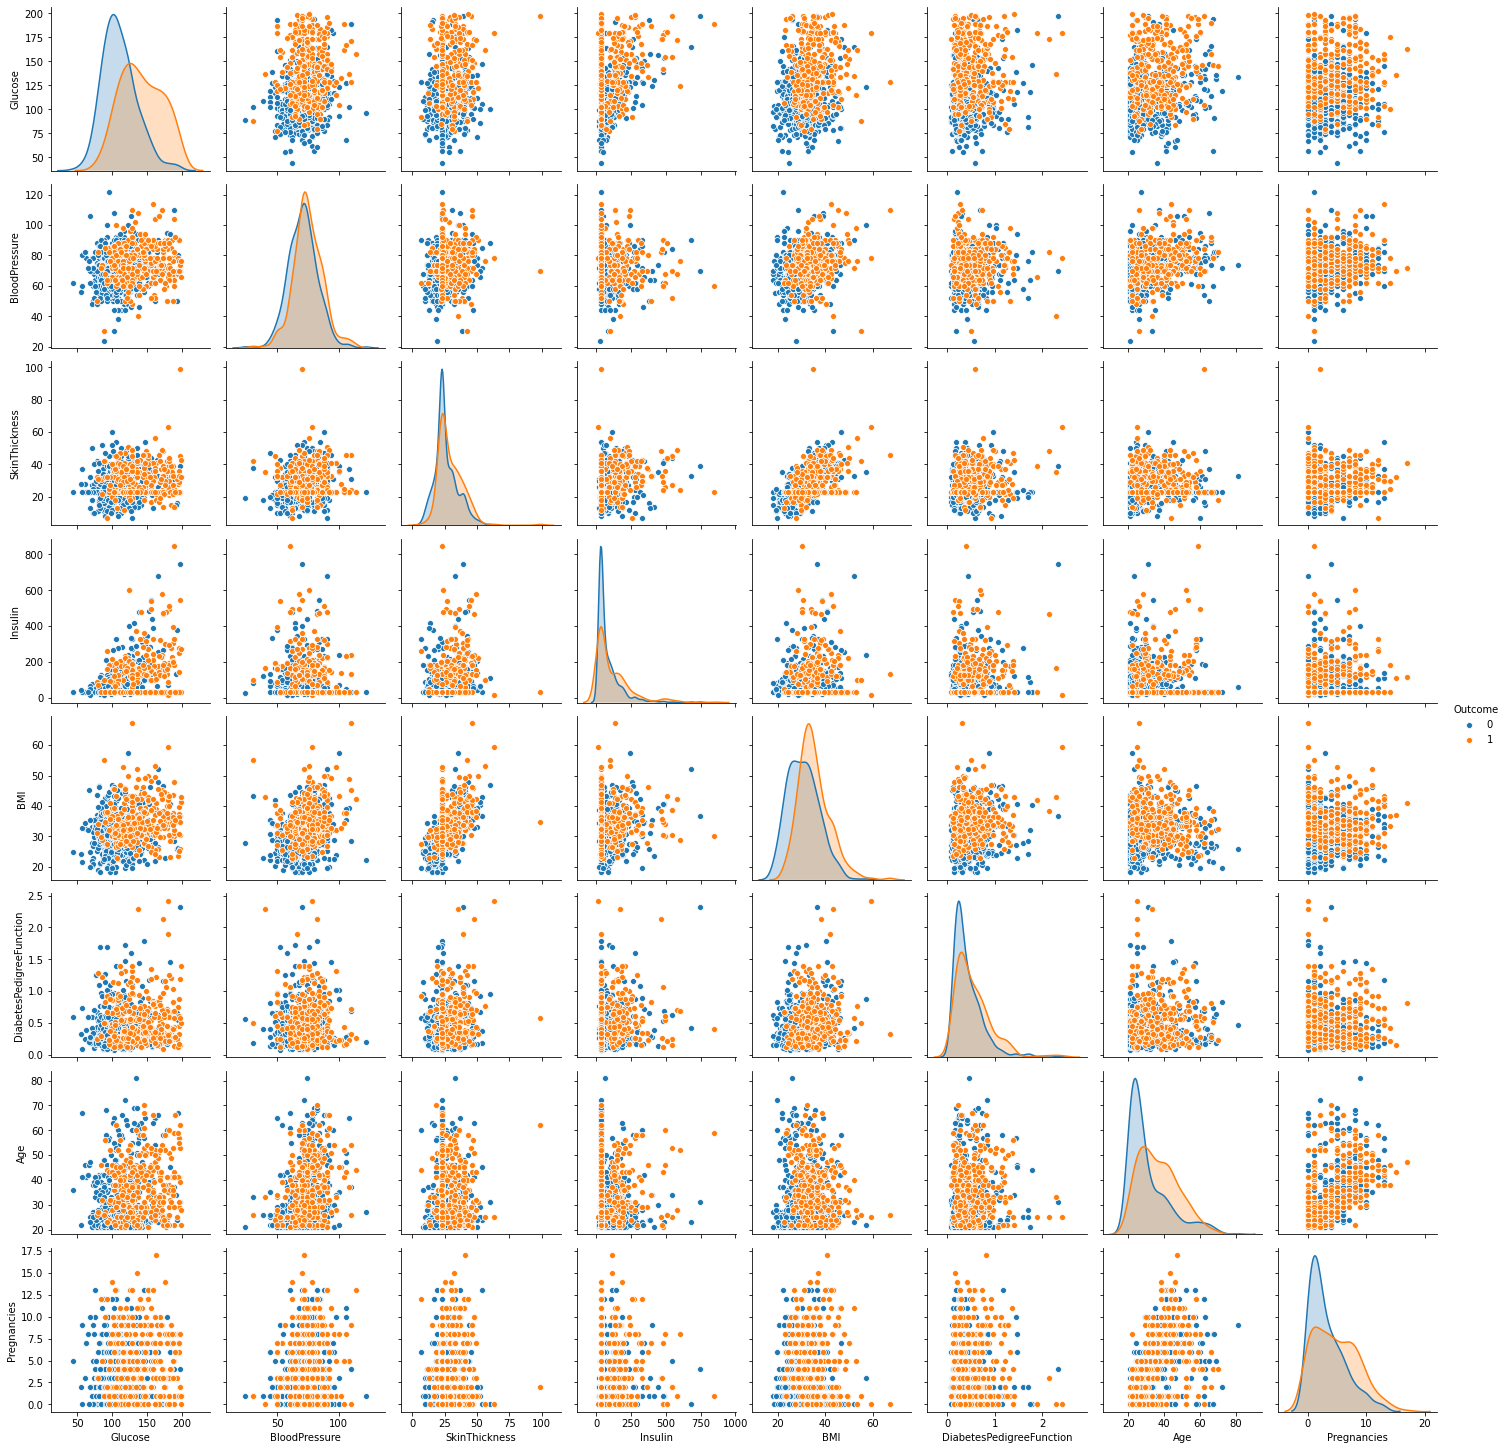

In [94]:
sns.pairplot(df_nonzero, diag_kind='kde', hue="Outcome") # plotting pairplot

### 4) Data Preprocessing

#### Duplicate Values
In most cases, the duplicates are removed so as to not give that particular data object an advantage or bias, when running machine learning algorithms.

In [100]:
df_nonzero.duplicated(subset=None, keep='first').sum() #There are no duplicates in the dataset

0

#### Imbalanced Data
An Imbalanced dataset is one where the number of instances of a class(es) are significantly higher than another class(es), thus leading to an imbalance and creating rarer class(es).

In [103]:
df.groupby(by="Outcome").count() #Based on the insight derived from this, it is obvious that there is no imbalance in our dataset, hence, there is no need for feature scaling, or generating new features (check and study on this to confirm if your conclusion here is true.)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268

Split Train and Test dataset. (0.7/0.3)

In [106]:
from sklearn.model_selection import train_test_split
X = df_nonzero.drop('Outcome', axis=1)
Y = df_nonzero['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# 5) ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [109]:
#Training Support vector Machines
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(C = 100,gamma= "scale")
clf.fit(X_train,Y_train) #Fitting Support Vector Machines

SVC(C=100)

In [149]:
print("Accuracy of train:",clf.score(X_train,Y_train))
print("Accuracy of test:",clf.score(X_test,Y_test))  #Evaluating model

Accuracy of train: 0.8119180633147114
Accuracy of test: 0.7835497835497836


Bias for training = 1-0.8119180633147114 = 0.1880819366852886 = 0.20  
Bias for test = 1-0.7835497835497836 = 0.21645021645021645 = 0.22  

Variance = test bias - training bias = 0.02836827976492784 = 0.03  

In [175]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

Y_pred = clf.predict(X_test)  #Testing model
print(classification_report(Y_test, Y_pred))
print( metrics.confusion_matrix(Y_test,Y_pred)) #Confusion  Matrix

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       146
           1       0.00      0.00      0.00        85

    accuracy                           0.63       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.40      0.63      0.49       231

[[146   0]
 [ 85   0]]


In [176]:
print("Precision = {}".format(precision_score(Y_test,Y_pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, Y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, Y_pred)))
print("F1 Score = {}".format(f1_score(Y_test, Y_pred,average='macro'))) #There is overfitting as the model perform poorly on test (0.63 Accuracy) as oppose train (0.81)

Precision = 0.31601731601731603
Recall = 0.5
Accuracy = 0.6320346320346321
F1 Score = 0.3872679045092838


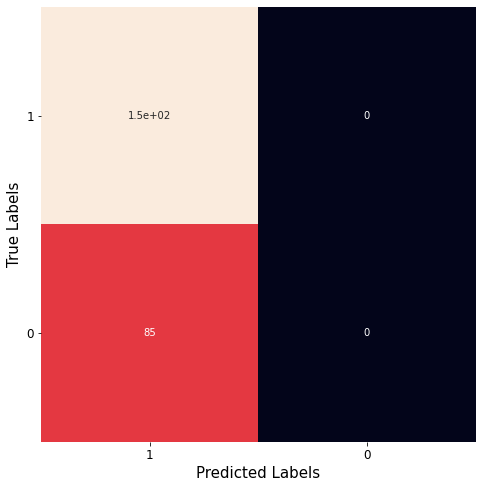

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(Y, fontsize = 12)
ax.yaxis.set_ticklabels(Y, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [118]:
#Scaling the datapoints using MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [121]:
#Zscore
from scipy.stats import zscore 
X_train_z = X_train.apply(zscore) # converting to Z score
X_test_z = X_test.apply(zscore)

In [158]:
# Model score on Minmax scaled values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_scaled,Y_train)
score2 = clf.score(X_test_scaled,Y_test)
score2

0.7532467532467533

In [163]:
print("Accuracy of train:",clf.score(X_train_scaled,Y_train))
print("Accuracy of test:",clf.score(X_test_scaled,Y_test))  #Evaluating model

Accuracy of train: 0.839851024208566
Accuracy of test: 0.7532467532467533


Bias for training = 1-0.839851024208566 = 0.16014897579143395 = 0.20  
Bias for test = 1-0.7532467532467533 = 0.24675324675324672 = 0.25  

Variance = test bias - training bias = 0.25 - 0.20 = 0.04999999999999999 = 0.05

In [127]:
# Model score using zscore  values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_z,Y_train)
score3 = clf.score(X_test_z,Y_test)
score3

0.7272727272727273

In [130]:
#we can try increasing either C or gamma to fit a more complex model.
clf = svm.SVC(C = 1000,gamma= "scale")
clf.fit(X_train,Y_train)
score4 = clf.score(X_test,Y_test)
print("Model score for non-scaled datapoints", score4)
# model accuracy has increased on non-scaled data,however for scaled values with c = 1000, model accuracy is decreasing.

Model score for non-scaled datapoints 0.7835497835497836


In [133]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [137]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5,
                                3.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [139]:
gs.best_estimator_
SVC(kernel='linear')
gs.best_score_

0.7653738644304683

In [141]:
#Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(Y_test,Y_pred)
print("AUC %0.3f" %auc)
#AUC measures how true positive rate (recall) and false positive rate trade off

AUC 0.743


In [143]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [144]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
results = []
names = []
scoring = 'accuracy'
import warnings
warnings.filterwarnings("ignore")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train,
cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Linear Discriminant Analysis is giving a better accuracy of 77% as compared with the other models.

LR: 0.765164 (0.060901)
LDA: 0.770790 (0.062164)
KNN: 0.696261 (0.085826)
CART: 0.692697 (0.048060)
NB: 0.730119 (0.054511)
SVM: 0.744794 (0.054232)
RFC: 0.752166 (0.053257)
